In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_path = 'Data/1hz3_T310.run.25000000.energy.xvg'

In [17]:
time = []
potential_energy = []
kinetic_energy = []
total_energy = []
temperature = []
pressure = []
volume = []

In [18]:
with open(file_path, 'r') as f:
    for line in f:
        if line.startswith('#') or line.startswith('@'):
            continue
        data = line.split()
        time.append(float(data[0]) / 1000)
        potential_energy.append(float(data[1]))
        kinetic_energy.append(float(data[2]))
        total_energy.append(float(data[3]))
        temperature.append(float(data[4]))
        pressure.append(float(data[5]))
        volume.append(float(data[6]))

In [19]:
time = np.array(time)
potential_energy = np.array(potential_energy)
kinetic_energy = np.array(kinetic_energy)
total_energy = np.array(total_energy)
temperature = np.array(temperature)
pressure = np.array(pressure)
volume = np.array(volume)

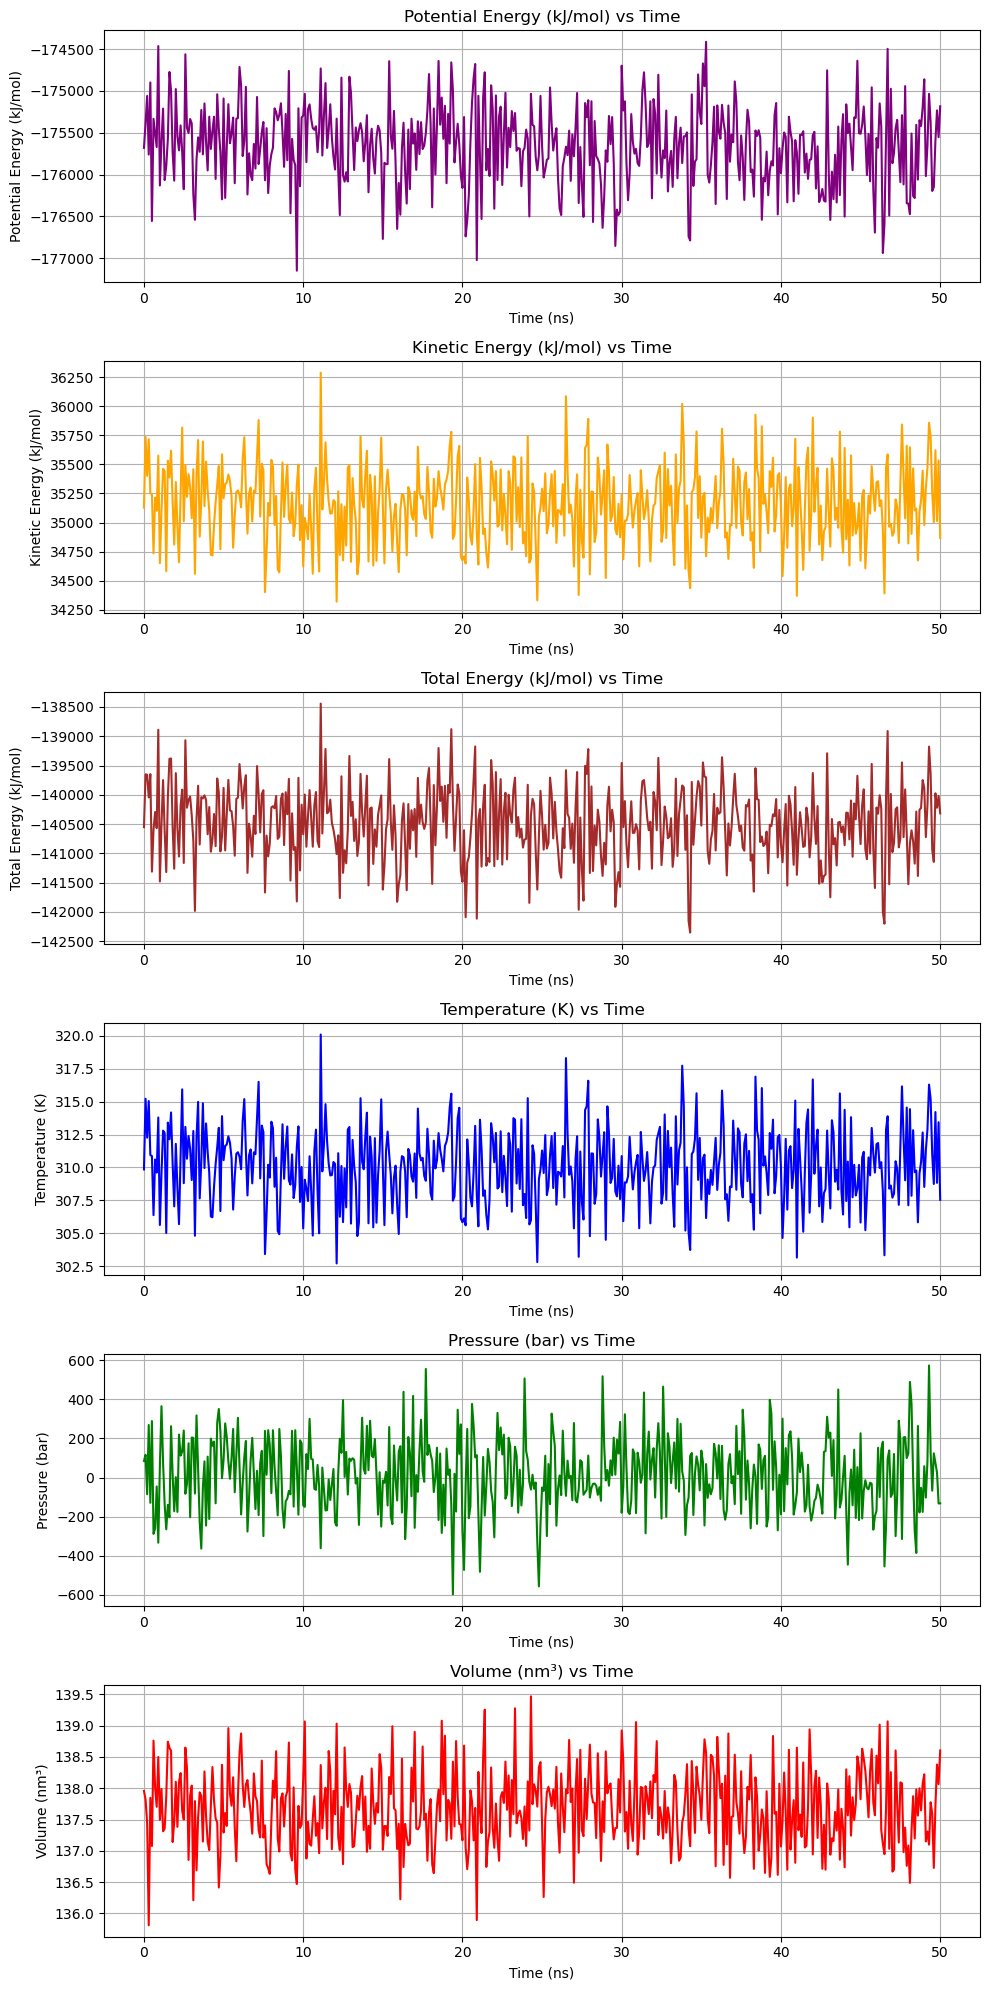

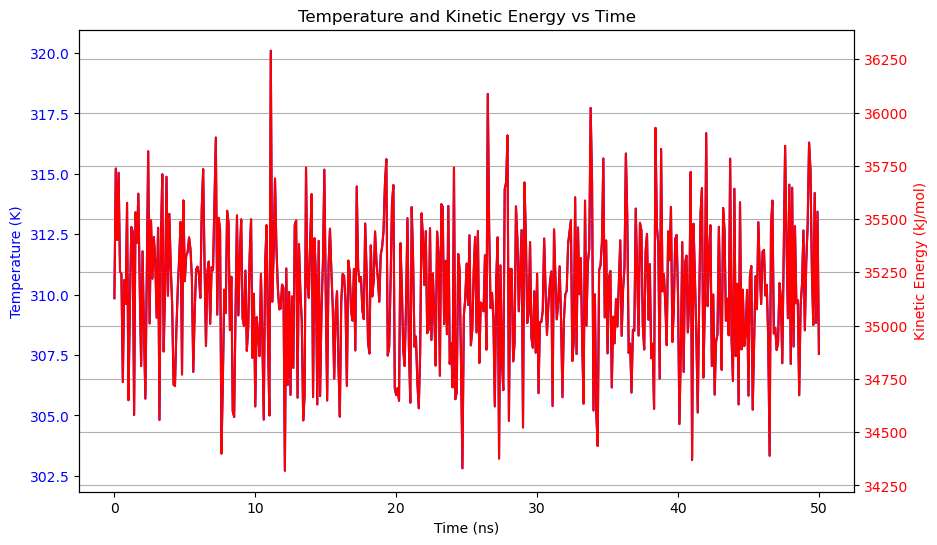

In [20]:
# Create subplots for each quantity vs time
fig, axes = plt.subplots(6, 1, figsize=(10, 20))

# Plot each quantity on a separate subplot
axes[0].plot(time, potential_energy, label='Potential Energy', color='purple')
axes[0].set_ylabel('Potential Energy (kJ/mol)')
axes[0].set_xlabel('Time (ns)')

axes[1].plot(time, kinetic_energy, label='Kinetic Energy', color='orange')
axes[1].set_ylabel('Kinetic Energy (kJ/mol)')
axes[1].set_xlabel('Time (ns)')

axes[2].plot(time, total_energy, label='Total Energy', color='brown')
axes[2].set_ylabel('Total Energy (kJ/mol)')
axes[2].set_xlabel('Time (ns)')

axes[3].plot(time, temperature, label='Temperature', color='blue')
axes[3].set_ylabel('Temperature (K)')
axes[3].set_xlabel('Time (ns)')

axes[4].plot(time, pressure, label='Pressure', color='green')
axes[4].set_ylabel('Pressure (bar)')
axes[4].set_xlabel('Time (ns)')

axes[5].plot(time, volume, label='Volume', color='red')
axes[5].set_ylabel('Volume (nm³)')
axes[5].set_xlabel('Time (ns)')

# Set titles for each subplot
for i, ax in enumerate(axes):
    ax.set_title(axes[i].get_ylabel() + ' vs Time')
    ax.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the subplot figure as a PDF
fig.savefig('subplots_vs_time.pdf')  # This saves all the subplots in one PDF file

# Display the plots
plt.show()

# Plot temperature and kinetic energy on the same plot with different y-axes
fig2, ax1 = plt.subplots(figsize=(10, 6))

# Plot temperature (left y-axis)
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Temperature (K)', color='blue')
ax1.plot(time, temperature, label='Temperature', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for kinetic energy
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Kinetic Energy (kJ/mol)', color='red')  # we already handled the x-label with ax1
ax2.plot(time, kinetic_energy, label='Kinetic Energy', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set the title
plt.title('Temperature and Kinetic Energy vs Time')

# Show grid and plot
plt.grid(True)

# Save this dual-axis plot as a PDF
fig2.savefig('temp_kinetic_energy_vs_time.pdf')

# Display the plot
plt.show()